<a href="https://colab.research.google.com/github/CodeGyokuro/test/blob/main/mnist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 91s 47ms/step - loss: 0.1251 - accuracy: 0.9624 - val_loss: 0.0515 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0367 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0303 - val_accuracy: 0

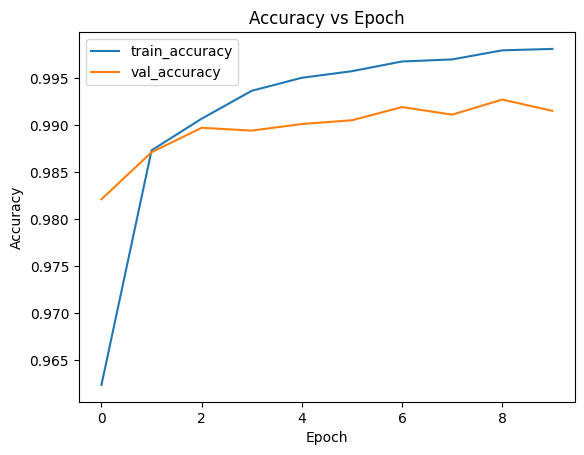

In [ ]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Importer Google Drive et monter le lecteur
from google.colab import drive
drive.mount('/content/drive')

# Charger les données d'entraînement et de test MNIST à partir de notre Google Drive
data_dir = '/content/drive/MyDrive/mnist'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='/content/drive/MyDrive/mnist/mnist.tar.gz')

# Redimensionner les images et normaliser les pixels
x_train = np.expand_dims(x_train / 255.0, axis=-1)
x_test = np.expand_dims(x_test / 255.0, axis=-1)

# Définir le modèle CNN en utilisant la classe Sequential de Keras
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compiler le modèle avec une fonction de perte, une fonction d'optimisation et des métriques
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement en utilisant la fonction fit de Keras
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Évaluer le modèle sur les données de test en utilisant la fonction evaluate de Keras
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Sauvegarder le modèle entraîné en utilisant la fonction save de Keras
model.save('/content/drive/MyDrive/models/mnist_cnn.h5')

# Afficher la courbe d'apprentissage
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
